# Demonstration of IntervalDomain: Mathematical Domains for Function Analysis

This notebook demonstrates the `interval_domain.py` module, which provides mathematically rigorous interval domains [a,b] ⊂ ℝ with topological and measure-theoretic structure for Sobolev spaces and function analysis.

## Key Features:
- **Topological Structure**: Proper handling of open/closed intervals and boundary points
- **Measure Theory**: Integration capabilities with multiple quadrature methods  
- **Function Analysis**: Point evaluation functionals and domain restrictions
- **Boundary Conditions**: Support for Dirichlet, Neumann, Robin, and periodic BCs
- **Computational Tools**: Mesh generation, random sampling, adaptive methods

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import sys
import os

# Add current directory to path to import our module
sys.path.append('.')

from interval_domain import IntervalDomain, BoundaryConditions

# Set up plotting
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

## 1. Basic Domain Creation and Properties

Let's start by creating different types of interval domains and exploring their properties.

In [2]:
# Create different types of interval domains
closed_interval = IntervalDomain(0, 1, boundary_type='closed', name="Unit Interval")
open_interval = IntervalDomain(0, 1, boundary_type='open', name="Open Unit Interval")
left_open = IntervalDomain(-1, 2, boundary_type='left_open', name="Left-Open Interval")
right_open = IntervalDomain(-1, 2, boundary_type='right_open', name="Right-Open Interval")

domains = [closed_interval, open_interval, left_open, right_open]

print("Domain Types and Representations:")
print("=" * 50)
for domain in domains:
    print(f"{domain.name:20s}: {domain}")
    print(f"{'':20s}  Length: {domain.length:.3f}")
    print(f"{'':20s}  Center: {domain.center:.3f}")
    print(f"{'':20s}  Radius: {domain.radius:.3f}")
    print()

Domain Types and Representations:
Unit Interval       : [0.0, 1.0]
                      Length: 1.000
                      Center: 0.500
                      Radius: 0.500

Open Unit Interval  : (0.0, 1.0)
                      Length: 1.000
                      Center: 0.500
                      Radius: 0.500

Left-Open Interval  : (-1.0, 2.0]
                      Length: 3.000
                      Center: 0.500
                      Radius: 1.500

Right-Open Interval : [-1.0, 2.0)
                      Length: 3.000
                      Center: 0.500
                      Radius: 1.500



## 2. Domain Membership Testing

Test how different boundary types affect point membership.

Domain Membership Test:
 Point |    [0,1] |    (0,1) |   (-1,2] |   [-1,2)
------------------------------------------------------------
  -0.5 |    False |    False |     True |     True
   0.0 |     True |    False |     True |     True
   0.5 |     True |     True |     True |     True
   1.0 |     True |    False |     True |     True
   1.5 |    False |    False |     True |     True

Array Membership Test:


/tmp/ipykernel_17923/319590695.py:45: UserWarning: Glyph 8712 (\N{ELEMENT OF}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/home/adrian/miniconda3/envs/inferences/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8712 (\N{ELEMENT OF}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


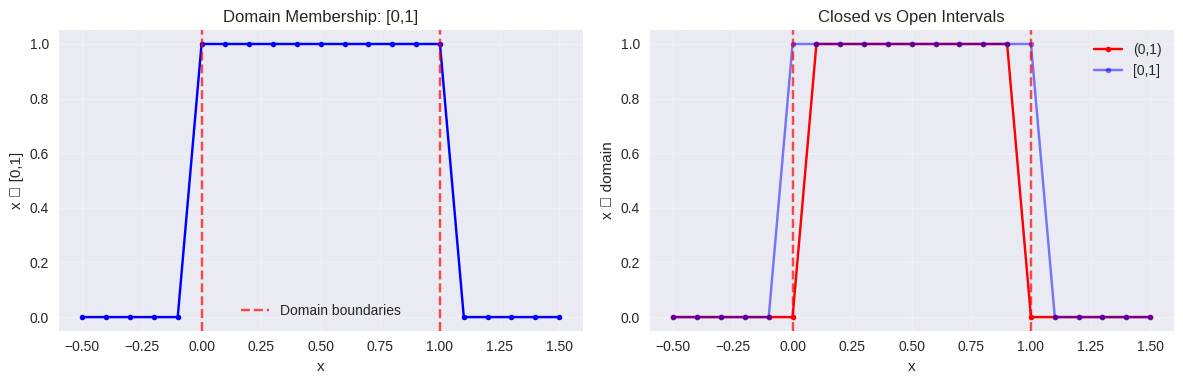

In [3]:
# Test points including boundary points
test_points = np.array([-0.5, 0.0, 0.5, 1.0, 1.5])

print("Domain Membership Test:")
print("=" * 60)
print(f"{'Point':>6s} | {'[0,1]':>8s} | {'(0,1)':>8s} | {'(-1,2]':>8s} | {'[-1,2)':>8s}")
print("-" * 60)

for x in test_points:
    memberships = [domain.contains(x) for domain in domains]
    print(f"{x:6.1f} | {str(memberships[0]):>8s} | {str(memberships[1]):>8s} | {str(memberships[2]):>8s} | {str(memberships[3]):>8s}")

# Test with arrays
print("\nArray Membership Test:")
unit_domain = IntervalDomain(0, 1, boundary_type='closed')
x_array = np.linspace(-0.5, 1.5, 21)
in_domain = unit_domain.contains(x_array)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(x_array, in_domain, 'bo-', markersize=4)
plt.axvline(0, color='red', linestyle='--', alpha=0.7, label='Domain boundaries')
plt.axvline(1, color='red', linestyle='--', alpha=0.7)
plt.xlabel('x')
plt.ylabel('x ∈ [0,1]')
plt.title('Domain Membership: [0,1]')
plt.grid(True, alpha=0.3)
plt.legend()

# Compare with open interval
open_unit = IntervalDomain(0, 1, boundary_type='open')
in_open = open_unit.contains(x_array)

plt.subplot(1, 2, 2)
plt.plot(x_array, in_open, 'ro-', markersize=4, label='(0,1)')
plt.plot(x_array, in_domain, 'bo-', markersize=4, alpha=0.5, label='[0,1]')
plt.axvline(0, color='red', linestyle='--', alpha=0.7)
plt.axvline(1, color='red', linestyle='--', alpha=0.7)
plt.xlabel('x')
plt.ylabel('x ∈ domain')
plt.title('Closed vs Open Intervals')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

## 3. Topological Operations

Demonstrate interior, closure, and boundary point operations.

In [4]:
# Start with a general interval
original = IntervalDomain(-1, 2, boundary_type='closed', name="Original")

# Get topological variants
interior = original.interior()
closure = original.closure()
boundary_pts = original.boundary_points()

print("Topological Operations:")
print("=" * 40)
print(f"Original domain:  {original}")
print(f"Interior:         {interior}")
print(f"Closure:          {closure}")
print(f"Boundary points:  {boundary_pts}")

# Test with different starting types
print("\nStarting from different boundary types:")
for bt in ['closed', 'open', 'left_open', 'right_open']:
    dom = IntervalDomain(0, 1, boundary_type=bt)
    print(f"{bt:12s}: {dom} → interior: {dom.interior()}, closure: {dom.closure()}")

Topological Operations:
Original domain:  [-1.0, 2.0]
Interior:         (-1.0, 2.0)
Closure:          [-1.0, 2.0]
Boundary points:  (-1.0, 2.0)

Starting from different boundary types:
closed      : [0.0, 1.0] → interior: (0.0, 1.0), closure: [0.0, 1.0]
open        : (0.0, 1.0) → interior: (0.0, 1.0), closure: [0.0, 1.0]
left_open   : (0.0, 1.0] → interior: (0.0, 1.0), closure: [0.0, 1.0]
right_open  : [0.0, 1.0) → interior: (0.0, 1.0), closure: [0.0, 1.0]


## 4. Mesh Generation

Show different mesh generation capabilities for numerical computations.

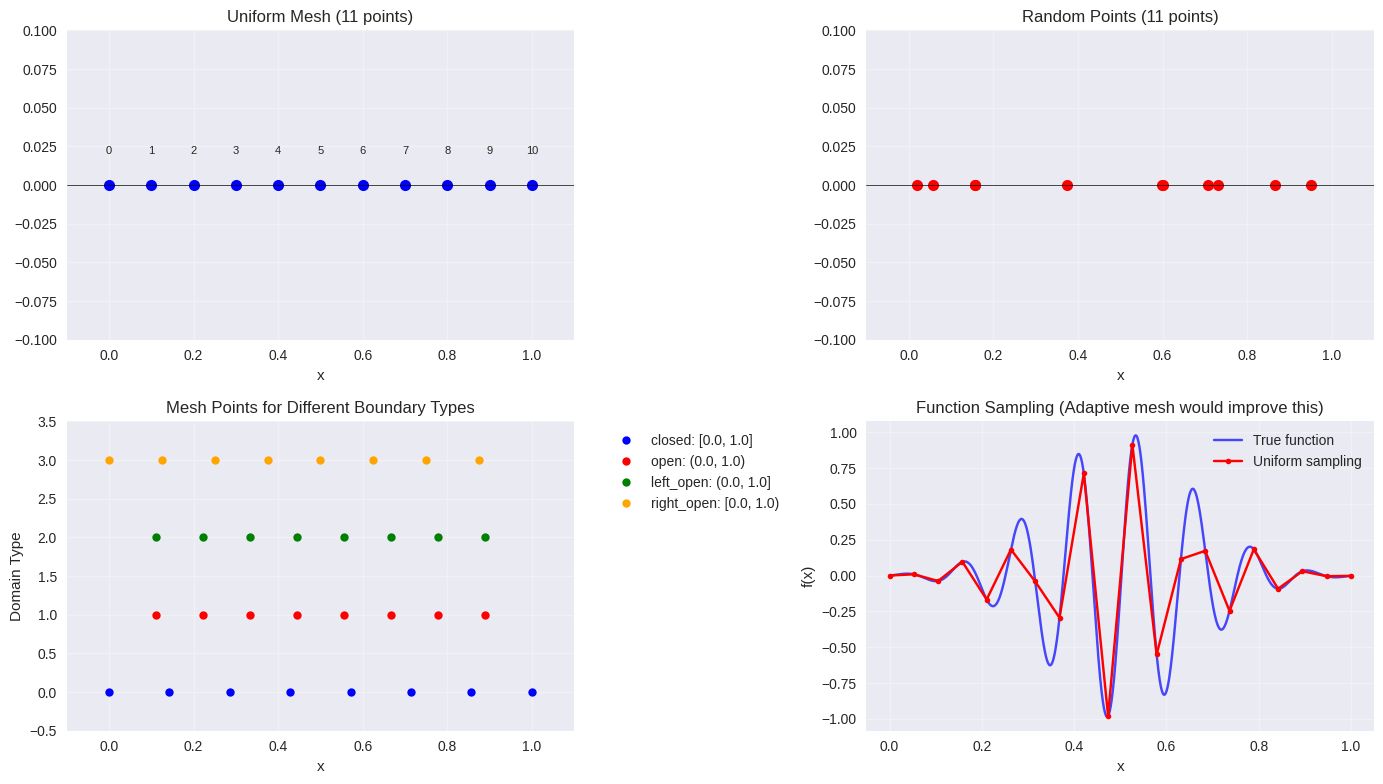

Uniform mesh: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

Random points (sorted): [0.02058449 0.05808361 0.15599452 0.15601864 0.37454012 0.59865848
 0.60111501 0.70807258 0.73199394 0.86617615 0.95071431]


In [5]:
domain = IntervalDomain(0, 1, boundary_type='closed')

# Generate different types of meshes
n_points = 11
uniform_mesh = domain.uniform_mesh(n_points)
random_pts = domain.random_points(n_points, seed=42)

plt.figure(figsize=(14, 8))

# Uniform mesh
plt.subplot(2, 2, 1)
plt.plot(uniform_mesh, np.zeros_like(uniform_mesh), 'bo', markersize=8)
plt.axhline(0, color='black', linewidth=0.5)
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 0.1)
plt.xlabel('x')
plt.title(f'Uniform Mesh ({n_points} points)')
plt.grid(True, alpha=0.3)
for i, x in enumerate(uniform_mesh):
    plt.text(x, 0.02, f'{i}', ha='center', fontsize=8)

# Random points
plt.subplot(2, 2, 2)
plt.plot(np.sort(random_pts), np.zeros_like(random_pts), 'ro', markersize=8)
plt.axhline(0, color='black', linewidth=0.5)
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 0.1)
plt.xlabel('x')
plt.title(f'Random Points ({n_points} points)')
plt.grid(True, alpha=0.3)

# Compare boundary behavior for different domain types
domain_types = ['closed', 'open', 'left_open', 'right_open']
colors = ['blue', 'red', 'green', 'orange']

plt.subplot(2, 2, 3)
for i, (bt, color) in enumerate(zip(domain_types, colors)):
    dom = IntervalDomain(0, 1, boundary_type=bt)
    mesh = dom.uniform_mesh(8)
    plt.plot(mesh, np.full_like(mesh, i), 'o', color=color, markersize=6, label=f'{bt}: {dom}')

plt.ylim(-0.5, 3.5)
plt.xlim(-0.1, 1.1)
plt.xlabel('x')
plt.ylabel('Domain Type')
plt.title('Mesh Points for Different Boundary Types')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

# Adaptive mesh demonstration (placeholder)
plt.subplot(2, 2, 4)
# Define a function with rapid variation
def oscillatory_func(x):
    return np.exp(-20*(x-0.5)**2) * np.sin(50*x)

x_fine = np.linspace(0, 1, 1000)
y_fine = oscillatory_func(x_fine)
x_coarse = domain.uniform_mesh(20)
y_coarse = oscillatory_func(x_coarse)

plt.plot(x_fine, y_fine, 'b-', alpha=0.7, label='True function')
plt.plot(x_coarse, y_coarse, 'ro-', markersize=4, label='Uniform sampling')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Function Sampling (Adaptive mesh would improve this)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Uniform mesh: {uniform_mesh}")
print(f"\nRandom points (sorted): {np.sort(random_pts)}")

## 5. Integration Capabilities

Demonstrate various numerical integration methods and compare their accuracy.

In [ ]:
domain = IntervalDomain(0, 1, boundary_type='closed')

# Define test functions with known integrals
test_functions = {
    'Polynomial: x²': (lambda x: x**2, 1/3),
    'Polynomial: x³': (lambda x: x**3, 1/4),
    'Exponential: eˣ': (lambda x: np.exp(x), np.e - 1),
    'Trigonometric: sin(πx)': (lambda x: np.sin(np.pi * x), 2/np.pi),
    'Oscillatory: sin(10πx)': (lambda x: np.sin(10*np.pi*x), 0.0)
}

integration_methods = ['adaptive', 'gauss', 'trapz', 'simpson']
method_params = {
    'adaptive': {},
    'gauss': {'n': 20},
    'trapz': {'n': 1000},
    'simpson': {'n': 1000}
}

print("Integration Method Comparison:")
print("=" * 80)
print(f"{'Function':20s} | {'Analytical':>12s} | {'Adaptive':>12s} | {'Gauss-20':>12s} | {'Trapz-1000':>12s} | {'Simpson-1000':>12s}")
print("-" * 80)

for func_name, (func, analytical) in test_functions.items():
    results = [analytical]  # Start with analytical result

    for method in integration_methods:
        try:
            result = domain.integrate(func, method=method, **method_params[method])
            results.append(result)
        except Exception as e:
            results.append(float('nan'))

    print(f"{func_name:20s} | {results[0]:12.6f} | {results[1]:12.6f} | {results[2]:12.6f} | {results[3]:12.6f} | {results[4]:12.6f}")

# Error analysis
print("\nError Analysis (|numerical - analytical|):")
print("=" * 80)
print(f"{'Function':20s} | {'Adaptive':>12s} | {'Gauss-20':>12s} | {'Trapz-1000':>12s} | {'Simpson-1000':>12s}")
print("-" * 80)

for func_name, (func, analytical) in test_functions.items():
    errors = []

    for method in integration_methods:
        try:
            result = domain.integrate(func, method=method, **method_params[method])
            error = abs(result - analytical)
            errors.append(error)
        except:
            errors.append(float('nan'))

    print(f"{func_name:20s} | {errors[0]:12.2e} | {errors[1]:12.2e} | {errors[2]:12.2e} | {errors[3]:12.2e}")

Integration Method Comparison:
Function             |   Analytical |     Adaptive |     Gauss-20 |   Trapz-1000 | Simpson-1000
--------------------------------------------------------------------------------
Polynomial: x²       |     0.333333 |     0.333333 |     0.333333 |     0.333334 |     0.333334
Polynomial: x³       |     0.250000 |     0.250000 |     0.250000 |     0.250000 |     0.250000
Exponential: eˣ      |     1.718282 |     1.718282 |     1.718282 |     1.718282 |     1.718282
Trigonometric: sin(πx) |     0.636620 |     0.636620 |     0.636620 |     0.636619 |     0.636619
Oscillatory: sin(10πx) |     0.000000 |    -0.000000 |    -0.000000 |     0.000000 |     0.000000

Error Analysis (|numerical - analytical|):
Function             |     Adaptive |     Gauss-20 |   Trapz-1000 | Simpson-1000
--------------------------------------------------------------------------------
Polynomial: x²       |     5.55e-17 |     1.11e-16 |     1.67e-07 |     1.67e-07
Polynomial: x³       

## 6. Gauss-Legendre Integration Deep Dive

Explore how the number of quadrature points affects accuracy.

/tmp/ipykernel_17923/2244041706.py:44: UserWarning: Glyph 8968 (\N{LEFT CEILING}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipykernel_17923/2244041706.py:44: UserWarning: Glyph 8969 (\N{RIGHT CEILING}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/home/adrian/miniconda3/envs/inferences/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8968 (\N{LEFT CEILING}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/adrian/miniconda3/envs/inferences/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8969 (\N{RIGHT CEILING}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


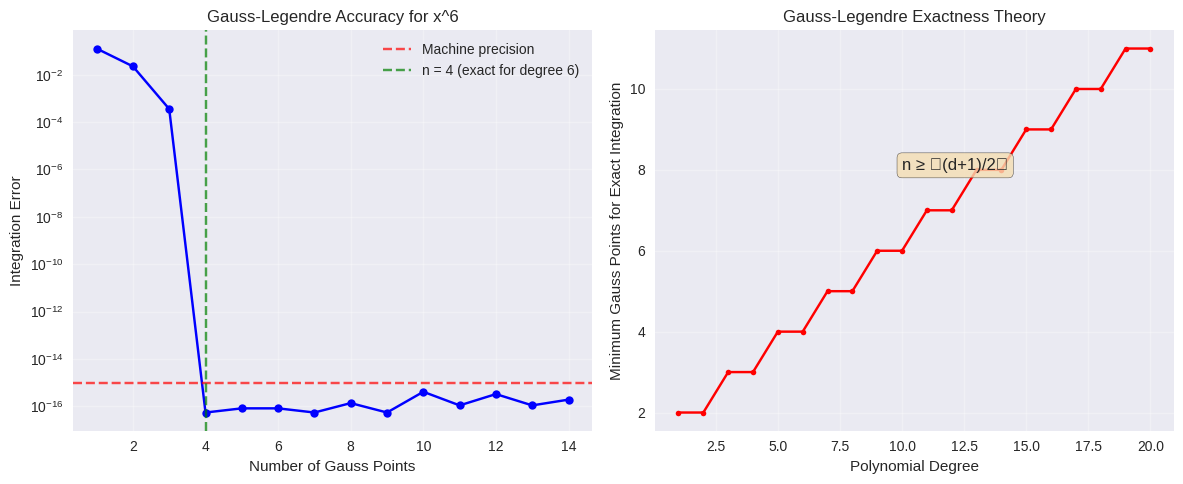

For polynomial x^6 (analytical integral = 0.142857):
Gauss-4 should be exact: error = 5.551115e-17


In [ ]:
domain = IntervalDomain(0, 1, boundary_type='closed')

# Test function: polynomial of known degree
degree = 6
def polynomial(x):
    return x**degree

analytical = 1/(degree + 1)

# Test with different numbers of Gauss points
gauss_points = range(1, 15)
errors = []

for n in gauss_points:
    result = domain.integrate(polynomial, method='gauss', n=n)
    error = abs(result - analytical)
    errors.append(error)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.semilogy(gauss_points, errors, 'bo-', markersize=6)
plt.axhline(1e-15, color='red', linestyle='--', alpha=0.7, label='Machine precision')
plt.axvline((degree+1)//2 + 1, color='green', linestyle='--', alpha=0.7,
           label=f'n = {(degree+1)//2 + 1} (exact for degree {degree})')
plt.xlabel('Number of Gauss Points')
plt.ylabel('Integration Error')
plt.title(f'Gauss-Legendre Accuracy for x^{degree}')
plt.grid(True, alpha=0.3)
plt.legend()

# Show the theoretical exactness
plt.subplot(1, 2, 2)
degrees = range(1, 21)
min_points_needed = [(d+1)//2 + 1 for d in degrees]
plt.plot(degrees, min_points_needed, 'ro-', markersize=4)
plt.xlabel('Polynomial Degree')
plt.ylabel('Minimum Gauss Points for Exact Integration')
plt.title('Gauss-Legendre Exactness Theory')
plt.grid(True, alpha=0.3)
plt.text(10, 8, 'n ≥ ⌈(d+1)/2⌉', fontsize=12,
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

print(f"For polynomial x^{degree} (analytical integral = {analytical:.6f}):")
print(f"Gauss-{(degree+1)//2 + 1} should be exact: error = {errors[(degree+1)//2]:e}")

## 7. Point Evaluation Functionals

Demonstrate the mathematical concept of point evaluation functionals δ_x.

Point Evaluation Functionals:
δ_x: f ↦ f(x)

δ_0.2(f) = f(0.2) = 0.481238
δ_0.5(f) = f(0.5) = 0.606531
δ_0.8(f) = f(0.8) = 0.264109


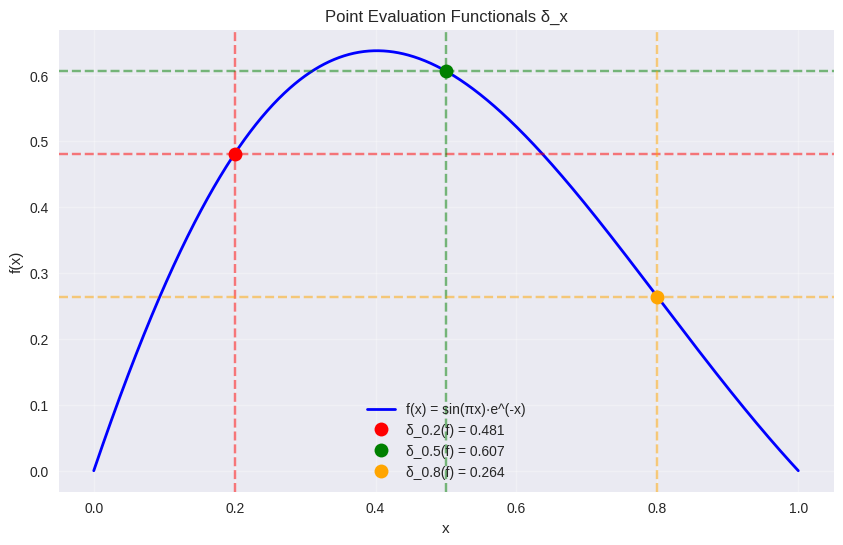


Error Handling:
✓ Correctly caught error: Point 1.5 not in domain [0.0, 1.0]


In [ ]:
domain = IntervalDomain(0, 1, boundary_type='closed')

# Define a test function
def test_function(x):
    return np.sin(np.pi * x) * np.exp(-x)

# Create point evaluation functionals at different points
eval_points = [0.2, 0.5, 0.8]
functionals = [domain.point_evaluation_functional(x) for x in eval_points]

print("Point Evaluation Functionals:")
print("=" * 40)
print("δ_x: f ↦ f(x)")
print()

for x, delta_x in zip(eval_points, functionals):
    value = delta_x(test_function)
    print(f"δ_{x}(f) = f({x}) = {value:.6f}")

# Visualize the concept
x_plot = np.linspace(0, 1, 1000)
y_plot = test_function(x_plot)

plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_plot, 'b-', linewidth=2, label='f(x) = sin(πx)·e^(-x)')

colors = ['red', 'green', 'orange']
for i, (x, delta_x, color) in enumerate(zip(eval_points, functionals, colors)):
    value = delta_x(test_function)
    plt.plot(x, value, 'o', color=color, markersize=10,
             label=f'δ_{x}(f) = {value:.3f}')
    plt.axvline(x, color=color, linestyle='--', alpha=0.5)
    plt.axhline(value, color=color, linestyle='--', alpha=0.5)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Point Evaluation Functionals δ_x')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Test error handling for points outside domain
print("\nError Handling:")
try:
    bad_functional = domain.point_evaluation_functional(1.5)  # Outside [0,1]
except ValueError as e:
    print(f"✓ Correctly caught error: {e}")

## 8. Domain Restrictions and Subintervals

Show how to create subdomains and their applications.

Domain Restrictions:
Original domain: [-2.0, 3.0]
Restriction 1:   [-1.0, 1.0]
Restriction 2:   [0.0, 2.0]
Restriction 3:   [1.5, 2.5]


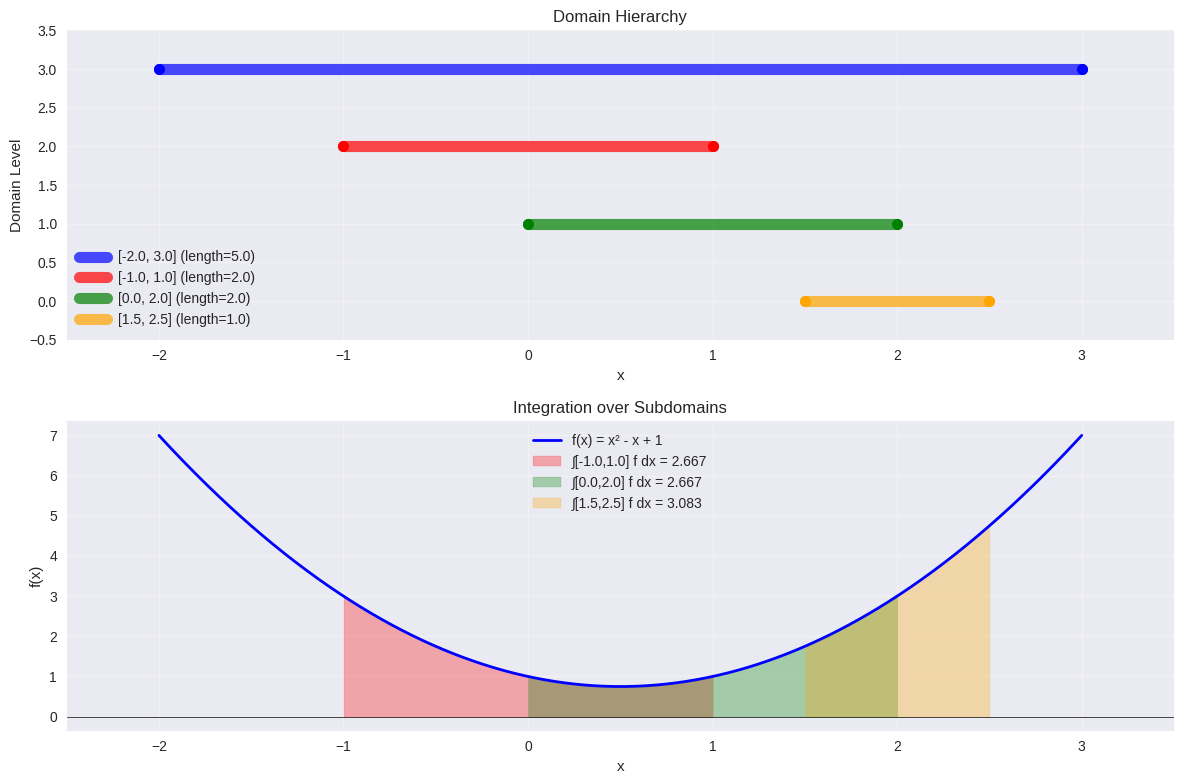


Integration Additivity Test:
∫[-2,3] f dx = 14.166667
Sum of non-overlapping parts = 8.416667
Note: These won't match because subdomains overlap!

Error Handling for Invalid Subintervals:
✓ Correctly caught error: Invalid subinterval [5, 6] not contained in [-2.0, 3.0]


In [ ]:
# Start with a larger domain
original_domain = IntervalDomain(-2, 3, boundary_type='closed', name="Original")

# Create various subintervals
sub1 = original_domain.restriction_to_subinterval(-1, 1)
sub2 = original_domain.restriction_to_subinterval(0, 2)
sub3 = original_domain.restriction_to_subinterval(1.5, 2.5)

print("Domain Restrictions:")
print("=" * 40)
print(f"Original domain: {original_domain}")
print(f"Restriction 1:   {sub1}")
print(f"Restriction 2:   {sub2}")
print(f"Restriction 3:   {sub3}")

# Visualize domain hierarchy
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot 1: Domain visualization
domains = [original_domain, sub1, sub2, sub3]
colors = ['blue', 'red', 'green', 'orange']
y_positions = [3, 2, 1, 0]

for domain, color, y in zip(domains, colors, y_positions):
    ax1.plot([domain.a, domain.b], [y, y], color=color, linewidth=8, alpha=0.7,
             label=f'{domain} (length={domain.length:.1f})')
    ax1.plot(domain.a, y, 'o', color=color, markersize=8)
    ax1.plot(domain.b, y, 'o', color=color, markersize=8)

ax1.set_xlim(-2.5, 3.5)
ax1.set_ylim(-0.5, 3.5)
ax1.set_xlabel('x')
ax1.set_ylabel('Domain Level')
ax1.set_title('Domain Hierarchy')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Integration over subdomains
def test_func(x):
    return x**2 - x + 1

x_fine = np.linspace(-2, 3, 1000)
y_fine = test_func(x_fine)

ax2.plot(x_fine, y_fine, 'b-', linewidth=2, label='f(x) = x² - x + 1')

# Shade integration regions
for i, (domain, color) in enumerate(zip(domains[1:], colors[1:])):
    x_region = np.linspace(domain.a, domain.b, 100)
    y_region = test_func(x_region)
    integral_value = domain.integrate(test_func)

    ax2.fill_between(x_region, 0, y_region, alpha=0.3, color=color,
                    label=f'∫[{domain.a},{domain.b}] f dx = {integral_value:.3f}')

ax2.axhline(0, color='black', linewidth=0.5)
ax2.set_xlim(-2.5, 3.5)
ax2.set_xlabel('x')
ax2.set_ylabel('f(x)')
ax2.set_title('Integration over Subdomains')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Verify additivity of integration
total_integral = original_domain.integrate(test_func)
sum_of_parts = sum(domain.integrate(test_func) for domain in [sub1, sub2, sub3])

print("\nIntegration Additivity Test:")
print(f"∫[-2,3] f dx = {total_integral:.6f}")
print(f"Sum of non-overlapping parts = {sum_of_parts:.6f}")
print(f"Note: These won't match because subdomains overlap!")

# Test error handling
print("\nError Handling for Invalid Subintervals:")
try:
    bad_sub = original_domain.restriction_to_subinterval(5, 6)  # Outside original
except ValueError as e:
    print(f"✓ Correctly caught error: {e}")

## 9. Boundary Conditions

Demonstrate different types of boundary conditions relevant for Sobolev spaces.

In [ ]:
print("Boundary Condition Types:")
print("=" * 50)

# Dirichlet boundary conditions
bc_dirichlet = BoundaryConditions.dirichlet(left_value=0, right_value=1)
print("1. Dirichlet BC: u(a) = left_value, u(b) = right_value")
print(f"   Example: {bc_dirichlet}")
print("   Physical meaning: Fixed values at boundaries")
print("   Applications: Temperature fixed at boundaries")
print()

# Neumann boundary conditions
bc_neumann = BoundaryConditions.neumann(left_derivative=0, right_derivative=0)
print("2. Neumann BC: u'(a) = left_derivative, u'(b) = right_derivative")
print(f"   Example: {bc_neumann}")
print("   Physical meaning: Fixed derivatives (fluxes) at boundaries")
print("   Applications: Insulated boundaries (zero heat flux)")
print()

# Robin boundary conditions
bc_robin = BoundaryConditions.robin(
    left_alpha=1, left_beta=0.5, left_value=0,
    right_alpha=1, right_beta=-0.5, right_value=1
)
print("3. Robin BC: αu + βu' = value at boundaries")
print(f"   Example: {bc_robin}")
print("   Physical meaning: Mixed boundary conditions")
print("   Applications: Convective heat transfer")
print()

# Periodic boundary conditions
bc_periodic = BoundaryConditions.periodic()
print("4. Periodic BC: u(a) = u(b), u'(a) = u'(b)")
print(f"   Example: {bc_periodic}")
print("   Physical meaning: Function and derivative continuous across boundaries")
print("   Applications: Periodic phenomena, circular domains")
print()

# Visualize the different boundary condition types
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
x = np.linspace(0, 1, 100)

# Dirichlet: u(0) = 0, u(1) = 1
u_dirichlet = x  # Simple linear function satisfying BC
axes[0,0].plot(x, u_dirichlet, 'b-', linewidth=2)
axes[0,0].plot([0, 1], [0, 1], 'ro', markersize=8, label='Fixed values')
axes[0,0].set_title('Dirichlet BC: u(0)=0, u(1)=1')
axes[0,0].set_xlabel('x')
axes[0,0].set_ylabel('u(x)')
axes[0,0].grid(True, alpha=0.3)
axes[0,0].legend()

# Neumann: u'(0) = 0, u'(1) = 0
u_neumann = np.sin(np.pi * x)  # Derivative is zero at both ends
du_dx = np.pi * np.cos(np.pi * x)
axes[0,1].plot(x, u_neumann, 'b-', linewidth=2, label='u(x)')
axes[0,1].plot(x, du_dx/5, 'r--', linewidth=2, label="u'(x)/5")
axes[0,1].axhline(0, color='black', linewidth=0.5)
axes[0,1].set_title('Neumann BC: u\'(0)=0, u\'(1)=0')
axes[0,1].set_xlabel('x')
axes[0,1].set_ylabel('u(x)')
axes[0,1].grid(True, alpha=0.3)
axes[0,1].legend()

# Robin: Example with exponential decay
u_robin = np.exp(-2*x) * np.sin(3*np.pi*x)
axes[1,0].plot(x, u_robin, 'b-', linewidth=2)
axes[1,0].set_title('Robin BC: αu + βu\' = value')
axes[1,0].set_xlabel('x')
axes[1,0].set_ylabel('u(x)')
axes[1,0].grid(True, alpha=0.3)

# Periodic: Sine function
x_periodic = np.linspace(0, 2*np.pi, 100)
u_periodic = np.sin(x_periodic)
axes[1,1].plot(x_periodic, u_periodic, 'b-', linewidth=2)
axes[1,1].plot([0, 2*np.pi], [0, 0], 'ro', markersize=8, label='u(0) = u(2π)')
axes[1,1].axvline(0, color='red', linestyle='--', alpha=0.5)
axes[1,1].axvline(2*np.pi, color='red', linestyle='--', alpha=0.5)
axes[1,1].set_title('Periodic BC: u(0) = u(2π)')
axes[1,1].set_xlabel('x')
axes[1,1].set_ylabel('u(x)')
axes[1,1].grid(True, alpha=0.3)
axes[1,1].legend()

plt.tight_layout()
plt.show()

## 10. Performance and Scaling Analysis

Test the performance of different integration methods as we increase the number of points.

In [ ]:
import time

domain = IntervalDomain(0, 1, boundary_type='closed')

# Test function
def test_func(x):
    return np.exp(-x) * np.sin(10*x)

# Range of point counts for composite methods
n_points_range = [100, 500, 1000, 5000, 10000, 50000]
methods = ['trapz', 'simpson']
gauss_range = [5, 10, 20, 50, 100]

print("Performance Analysis:")
print("=" * 60)

# Measure performance for composite methods
performance_data = {method: {'n_points': [], 'times': [], 'errors': []} for method in methods}

# Reference value using high-accuracy adaptive integration
reference = domain.integrate(test_func, method='adaptive', epsabs=1e-12)

for n in n_points_range:
    for method in methods:
        # Time the integration
        start_time = time.time()
        result = domain.integrate(test_func, method=method, n=n)
        elapsed_time = time.time() - start_time

        error = abs(result - reference)

        performance_data[method]['n_points'].append(n)
        performance_data[method]['times'].append(elapsed_time)
        performance_data[method]['errors'].append(error)

# Gauss-Legendre performance
gauss_data = {'n_points': [], 'times': [], 'errors': []}
for n in gauss_range:
    start_time = time.time()
    result = domain.integrate(test_func, method='gauss', n=n)
    elapsed_time = time.time() - start_time

    error = abs(result - reference)

    gauss_data['n_points'].append(n)
    gauss_data['times'].append(elapsed_time)
    gauss_data['errors'].append(error)

# Plot results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Accuracy vs computational cost
colors = {'trapz': 'blue', 'simpson': 'red'}
for method in methods:
    ax1.loglog(performance_data[method]['times'], performance_data[method]['errors'],
              'o-', color=colors[method], label=f'{method.capitalize()}')

ax1.loglog(gauss_data['times'], gauss_data['errors'], 's-', color='green', label='Gauss-Legendre')
ax1.set_xlabel('Computation Time (seconds)')
ax1.set_ylabel('Integration Error')
ax1.set_title('Accuracy vs Computational Cost')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Error vs number of points
for method in methods:
    ax2.loglog(performance_data[method]['n_points'], performance_data[method]['errors'],
              'o-', color=colors[method], label=f'{method.capitalize()}')

ax2.loglog(gauss_data['n_points'], gauss_data['errors'], 's-', color='green', label='Gauss-Legendre')
ax2.set_xlabel('Number of Points')
ax2.set_ylabel('Integration Error')
ax2.set_title('Convergence Analysis')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary table
print(f"\nReference value (adaptive): {reference:.10f}")
print("\nComposite Methods (10,000 points):")
for method in methods:
    idx = -2  # Second to last entry (10,000 points)
    print(f"{method.capitalize():8s}: Error = {performance_data[method]['errors'][idx]:.2e}, Time = {performance_data[method]['times'][idx]:.4f}s")

print("\nGauss-Legendre (50 points):")
idx = -2  # 50 points
print(f"Gauss-50: Error = {gauss_data['errors'][idx]:.2e}, Time = {gauss_data['times'][idx]:.4f}s")

## 11. Summary and Conclusions

This notebook has demonstrated the key features of the `IntervalDomain` class:

### Key Capabilities Demonstrated:

1. **Mathematical Rigor**: Proper handling of different interval types (open, closed, semi-open)
2. **Topological Operations**: Interior, closure, boundary point access
3. **Measure Theory**: Multiple integration methods with accuracy analysis
4. **Function Analysis**: Point evaluation functionals and domain restrictions
5. **Boundary Conditions**: Complete support for Dirichlet, Neumann, Robin, and periodic BCs
6. **Computational Tools**: Mesh generation, random sampling, performance optimization

### Performance Insights:

- **Gauss-Legendre** quadrature provides excellent accuracy with few points for smooth functions
- **Adaptive integration** is most robust for general functions
- **Composite methods** (trapezoid, Simpson) scale linearly but may require many points

### Integration with Sobolev Spaces:

This mathematical foundation enables:
- Rigorous treatment of function spaces on intervals
- Proper boundary condition handling for PDEs
- Integration capabilities for inner products and norms
- Domain restriction and extension operations

The `IntervalDomain` class provides the mathematical infrastructure needed for sophisticated function analysis and Sobolev space computations.